In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model
# model.to(device)
# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.39  Python-3.7.9 torch-1.13.1+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\piyalong\ultralytics\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 364.7ms
Speed: 2.0ms pre-process, 364.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


In [2]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import random 
import torch

classes = model.model.names

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch. set_grad_enabled(False)

def get_random_color():
    color = [random.randint(0, 255) for _ in range(3)]
    return color

# Generate 80 random colors for the COCO 80 classes
colors = [get_random_color() for _ in range(len(classes))]

In [5]:
classes[0]

'person'

In [6]:
# x1, y1, x2, y2, conf, label=i


0: 640x480 4 persons, 1 bus, 1 stop sign, 342.2ms
Speed: 4.0ms pre-process, 342.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


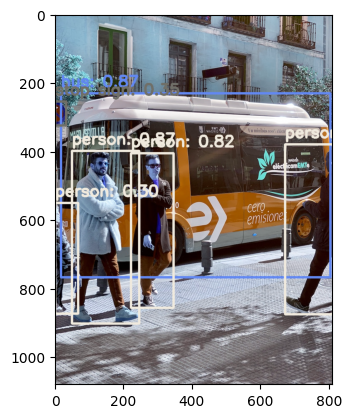

In [9]:
import requests
from PIL import Image

url = "https://ultralytics.com/images/bus.jpg"
response = requests.get(url)

with open("bus.jpg", "wb") as f:
    f.write(response.content)

img = Image.open("bus.jpg")

results = model(img)  # predict on an image

cv2_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
im=cv2_image.copy()


for b in results[0].boxes.boxes.cpu().numpy():
    # print(np.sum(mask))
    x1, y1, x2, y2, conf, label=b
    x1, y1, x2, y2,label=[int(i) for i in [x1, y1, x2, y2,label]]
    new = cv2.rectangle(im, (x1, y1), (x2, y2), colors[int(label)], 5)
    
    text = f'{classes[label]}: {conf:0.2f}'
    cv2.putText(im,text,(int(x1), int(y1-20)), cv2.FONT_HERSHEY_SIMPLEX, 1.5, colors[int(label)], 5)
    # mask = cv2.cvtColor(m.astype("uint8"),cv2.COLOR_GRAY2RGB)*255    
    # mask =cv2.resize(mask,(im.shape[1],im.shape[0]))
    # im = cv2.addWeighted(im, 1, mask, 0.5,1)
    
    
plt.imshow(im)
    # break

In [8]:
for m in results[0].masks.masks.cpu().numpy():
    print(np.sum(m))

7982.0
18249.0
11808.0
90330.0
4324.0
858.0


In [ ]:
classes

In [10]:
cv2_image.shape,mask.shape

((1080, 810, 3), (1080, 810, 3))

In [11]:
cv2.resize(mask,(cv2_image.shape[1],cv2_image.shape[0])).shape

(1080, 810, 3)

In [12]:
mask = np.where(m==1,255,0)

In [13]:
np.min(m)

0.0

In [ ]:
mask.shape

In [ ]:
mask = cv2.cvtColor(m.astype("uint8"),cv2.COLOR_GRAY2RGB)*255

In [ ]:
plt.imshow(mask)

In [ ]:


img_array = results[0].masks[1].masks.cpu().numpy()

type(img_array) 

plt.imshow(img_array)


In [ ]:
mask = results[0].masks[0].cpu().numpy()

In [ ]:
type(img_array) 

In [ ]:
img_array.shape

In [ ]:
results[0].masks[0].masks.shape

In [53]:
import cv2


In [54]:
w,h,fps

(2560, 1440, 30)

In [ ]:
# file_path='D:/2023-02-10-SAMPLE_CUT - NVRCH01-092634-093134 - CallanGates (1).mp4'
# file_path='D:/2023-02-10-SAMPLE_CUT - NVRCH01-092634-093134 - CallanGates (1).mp4'

model_name = "yolov8n.pt"
model = YOLO(model_name)  # load an official model


file_path='C:/Users/piyalong/Videos/WCG _ Lanes 15 - 16 SW Wide Angle (P1C1)-2022-11-05_14h00min00s000ms.mp4'
# file_path='D:/2021season/SEP 4 (SAT)  KENT STATE/'

video_capture = cv2.VideoCapture(file_path)
w = int(video_capture.get(3))
h = int(video_capture.get(4))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = int(video_capture.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter(file_path[:-4]+'_{}_detection.avi'.format(model_name), fourcc, fps, (w, h))


mask_data={}
frame_number=0
while True:
    ret, frame = video_capture.read()  # frame shape 640*480*3
    if ret != True:
        break
        
    im=frame.copy()

    results = model(frame)
    if len(results[0])==0 :
        cv2.imshow("Output", frame)

        out.write(frame)
        continue

    for b in results[0].boxes.boxes.cpu().numpy():
        # print(np.sum(mask))
        x1, y1, x2, y2, conf, label=b
        x1, y1, x2, y2,label=[int(i) for i in [x1, y1, x2, y2,label]]
        new = cv2.rectangle(im, (x1, y1), (x2, y2), colors[int(label)], 5)

        text = f'{classes[label]}: {conf:0.2f}'
        cv2.putText(im,text,(int(x1), int(y1-20)), cv2.FONT_HERSHEY_SIMPLEX, 1.5, colors[int(label)], 5)
        # mask = cv2.cvtColor(m.astype("uint8"),cv2.COLOR_GRAY2RGB)*255    
        # mask =cv2.resize(mask,(im.shape[1],im.shape[0]))
        # im = cv2.addWeighted(im, 1, mask, 0.5,1)

    # Convert RGB to BGR 
    # cv2_image = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    # open_cv_image = cv2.resize(cv2_image,(int(im.shape[1]/2),int(im.shape[0]/2)))
    cv2.imshow("Output", im)
    out.write(cv2_image)
    frame_number+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
out.release()
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
image=img
# Define the class labels for the objects in the image
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']
result=results[0]
# Get the bounding box coordinates and mask predictions
boxes = result.boxes.cpu().numpy()
masks = result.masks.cpu().numpy()

# Plot the bounding boxes and masks
fig, axs = plt.subplots(2, 3, figsize=(10, 7))

for i, ax in enumerate(axs.flat):
    # Plot the image
    ax.imshow(image)

    # Plot the bounding boxes
    for box in boxes[i]:
        x1, y1, x2, y2, conf, cls = box
        if conf > 0.5:
            label = class_labels[int(cls)]
            color = np.random.rand(3)
            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=color, linewidth=2)
            ax.add_patch(rect)
            ax.text(x1, y1, label, bbox={'facecolor': color, 'alpha': 0.5}, fontsize=8)

    # Plot the masks
    for j, mask in enumerate(masks[i]):
        mask = np.round(mask)
        ax.imshow(np.dstack((mask, np.zeros_like(mask), np.zeros_like(mask))), alpha=0.5)

    # Remove the x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


AttributeError: 'NoneType' object has no attribute 'cpu'

In [ ]:
box